# Songs Popularity with Machine Learning

# INFO 1998 Spring '23 Final Project

# Jillian Chong & Jolly Zheng

## Introduction

In the following project, we will predict whether or not a song is or will be popular. The dataset we will train on contains the most streamed songs of all time, so in terms of popularity, all of these songs are considered popular. However, for the purposes of this model, we deemed a song popular if it has amassed at least 2 billion streams on Spotify. Based on this definition of popular, we will use the features provided with the dataset to predict whether a song is capable of being popular (whether or not it is capable of amassing 2 billion or more streams).

Dataset: kaggle.com/datasets/amaanansari09/most-streamed-songs-all-time

In [1]:
import opendatasets as od
import pandas as pd
import seaborn as sns

#od.download("kaggle.com/datasets/amaanansari09/most-streamed-songs-all-time")

The link above provides us access to two datasets, both regarding the 100 most streamed songs of all time. The features dataset gives us the song and its information to 14 features. The streams dataset gives us the song and its respective number of streams in billions. Below are the first five rows and the general statistics of each dataset. 

In [2]:
features = pd.read_csv('Features.csv')
streams = pd.read_csv('Streams.csv')

In [3]:
features.head()

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825
2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824
3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501
4,0e7ipj03S05BNilyu5bRzt,Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585


In [4]:
features.describe() #general statistics

,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.635300,0.625500,5.340000,-6.17631,0.650000,0.096448,0.260955,0.007848,0.165682,0.502032,121.253900,0.649630
std,0.807997,0.160045,3.627114,2.00858,0.479372,0.088872,0.272764,0.048977,0.122867,0.224953,29.544364,0.144618
min,1.520000,0.185000,0.000000,-12.20500,0.000000,0.028100,0.000025,0.000000,0.034400,0.061200,74.897000,0.340000
25%,3.122500,0.523750,2.000000,-7.10375,0.000000,0.041200,0.026150,0.000000,0.094300,0.340750,98.022000,0.548000
50%,3.505000,0.640000,6.000000,-5.97150,1.000000,0.059400,0.162500,0.000000,0.114000,0.492000,116.864000,0.671500
75%,4.030000,0.741000,8.250000,-4.94075,1.000000,0.106000,0.431500,0.000086,0.217000,0.663000,142.439500,0.759250
max,7.050000,0.912000,11.000000,-2.81000,1.000000,0.438000,0.945000,0.459000,0.790000,0.969000,186.003000,0.921000


In [5]:
streams.head()

,Song,Artist,Streams (Billions),Release Date
0,Blinding Lights,The Weeknd,3.449,29-Nov-19
1,Shape of You,Ed Sheeran,3.398,06-Jan-17
2,Dance Monkey,Tones And I,2.770,10-May-19
3,Someone You Loved,Lewis Capaldi,2.680,08-Nov-18
4,Rockstar,Post Malone featuring 21 Savage,2.620,15-Sep-17


In [6]:
streams.describe()

,Streams (Billions)
count,100.000000
mean,1.896000
std,0.371272
min,1.521000
25%,1.647000
50%,1.770500
75%,2.046000
max,3.449000


We check if there are any NaN values to see if we need to clean anything up. Fortunately, there aren't any NaN values. We want to merge the two datasets together so it is easier for us to use them later on. 

In [7]:
features.isnull().values.any() # no NANs

False

In [8]:
streams.isnull().values.any()

False

In [9]:
streams = streams.rename(columns={"Song":"name"})

In [10]:
#Join both of the features and streams dataset together
merged = pd.merge(features, streams, left_on="name", right_on="name")

With everything merged and confirmed with no NaN values, we are ready to go onto visualization!

## Basic Data Visualization

### Correlation Heatmap

<AxesSubplot: >

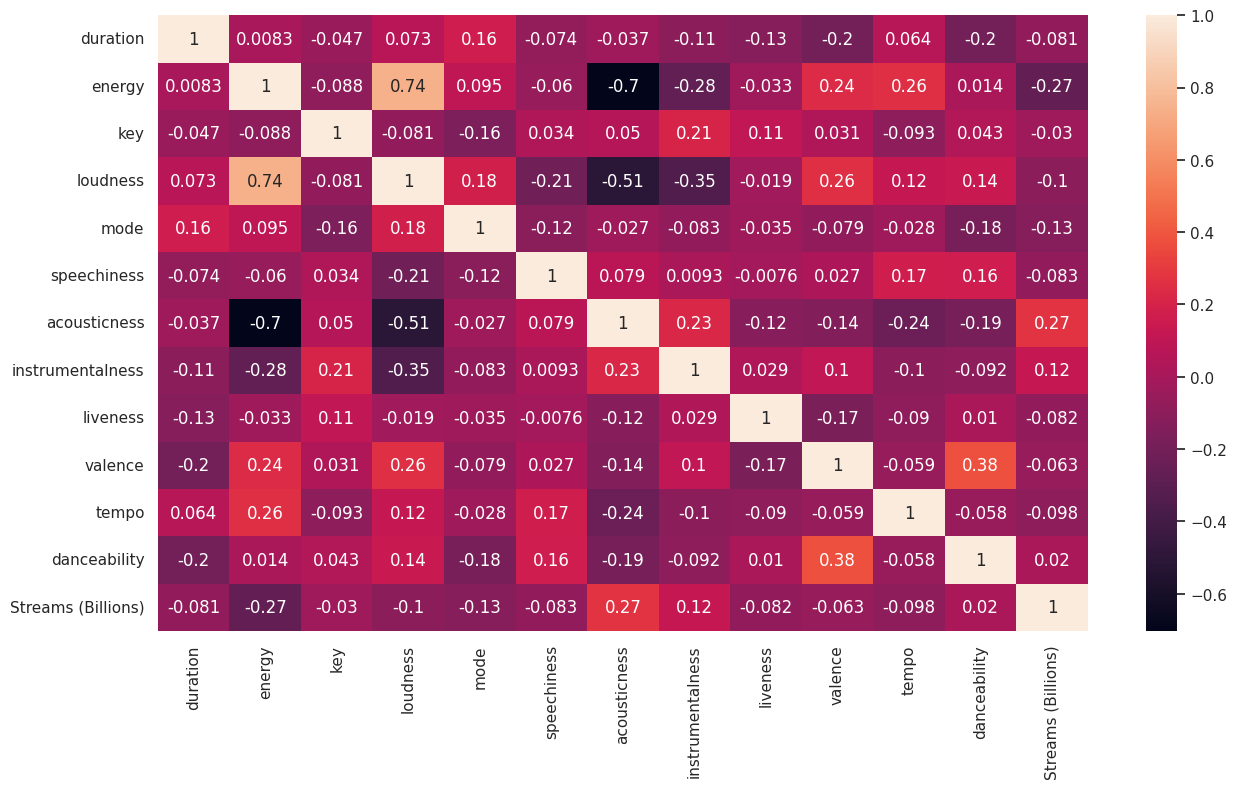

In [11]:
# Correlation Plot Between Features Including the Streams
corr_merged = merged.corr()

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_merged, annot=True)

The above heatmap shows the relationship between the features of the data frames to each other. The sides show the variable names that are associated with the column/row. On the right side, there is a colored bar that shows the intensity of color associated with a correlation number (the darker the color of intensity, the more correlated the features are with one another).

From the heatmap above, we can see that a lot of the features are not very correlated with the popularity of the song (aka Streams (Billions)). However, let's get a more in-depth view of the most correlated ones. The order of correlation of the feature to the number of streams from most correlated to least correlated is as follows: energy, acousticness, mode, instrumentalness, loudness, tempo, speechiness, liveness, duration, valence, key, danceability. We should be able to use this correlation matrix to help us with feature selection when we are making our models later in the notebook.

### Scatterplots

In [12]:
import matplotlib.pyplot as plt

Moving onto our second visualization, since our metric of song popularity is based on streams, using the heatmap above, we find the highest correlated variables to streams of the song. We decided to use the two most correlated which are energy and acoustics. 

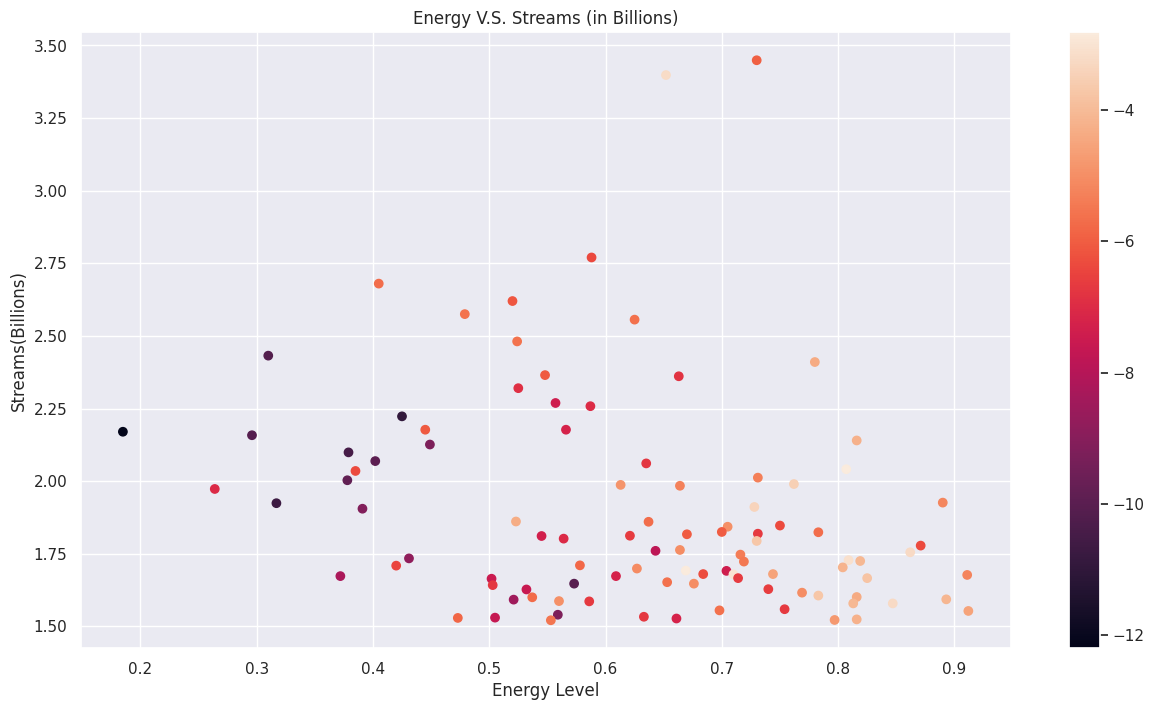

In [13]:
#Correlation number between Streams (Billions) & Energy: 0.27
#Correlation number between Energy & Loudness: 0.74
#Scatterplot Streams (in Billions) V.S. Energy 

plt.scatter(merged['energy'], merged['Streams (Billions)'], c = merged['loudness'])
plt.title('Energy V.S. Streams (in Billions)')
plt.xlabel('Energy Level')
plt.ylabel('Streams(Billions)')
plt.colorbar()
plt.show()

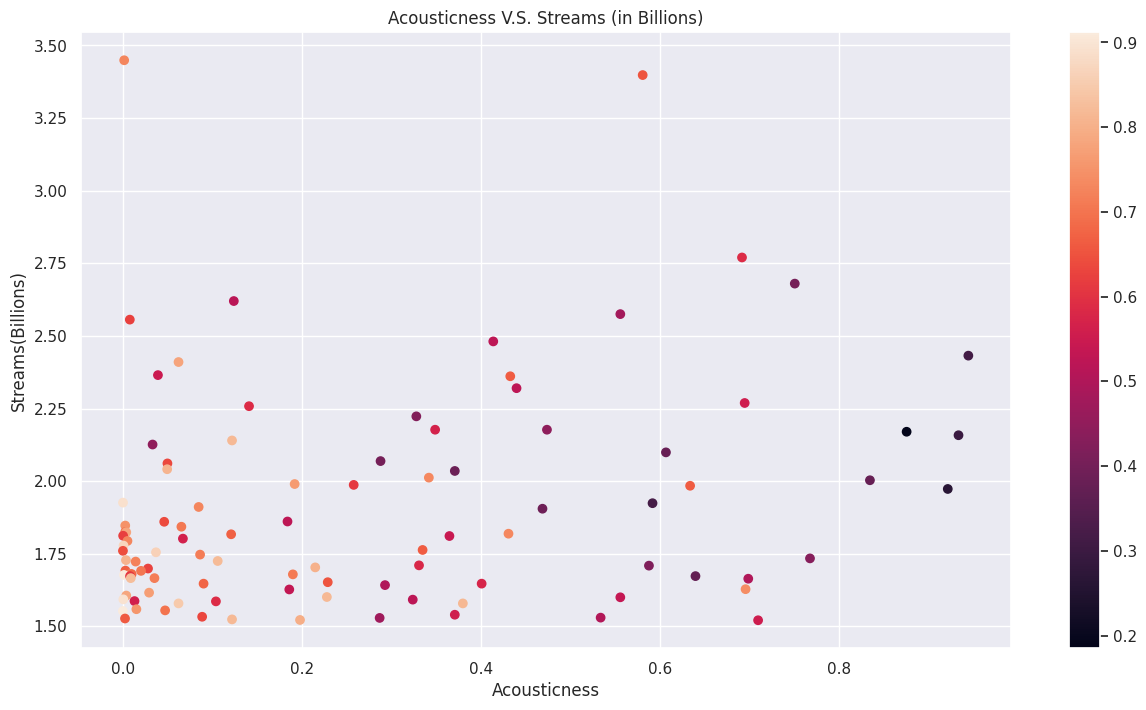

In [14]:
#Correlation number between Streams (Billions) & Acousticness: 0.27
#Correlation number between Energy & Acoustiness: -0.7
#Scatterplot Streams (in Billions) V.S. Acousticness 
plt.scatter(merged['acousticness'], merged['Streams (Billions)'],c= merged['energy'])
plt.title('Acousticness V.S. Streams (in Billions)')
plt.xlabel('Acousticness')
plt.ylabel('Streams(Billions)')

plt.colorbar()
plt.show()

## Machine Learning

### Linear Regression Model

The linear regression predicts the number of streams in billions for a particular song given features of the song. 

In [15]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [156]:
model_streams = LinearRegression()
#X_s = merged[['acousticness','energy','mode','instrumentalness','loudness','tempo','speechiness','liveness','duration','valence','key','danceability']]
#X_s = merged[['acousticness','energy','loudness']]

X_s = merged[['acousticness','energy','mode','instrumentalness','loudness','tempo']]
Y_s = merged['Streams (Billions)']

x_tr_s, x_te_s, y_tr_s, y_te_s = train_test_split(X_s, Y_s, test_size=0.2, random_state=42)
model_streams.fit(x_tr_s, y_tr_s)

# store the predictions for the test sets
model_streams_preds = model_streams.predict(x_te_s)

# find mean squared error of each model's predictions
streams_MSE = mean_squared_error(y_te_s, model_streams_preds)

print("streams MSE:", streams_MSE)

print("sklearn's score for streams:", model_streams.score(x_tr_s, y_tr_s))
test_goal_mean_s = y_te_s.mean()
baseline_s = np.full((len(model_streams_preds),), test_goal_mean_s)
baseline_s_MSE = mean_squared_error(y_te_s, baseline_s)

score_s = 1 - streams_MSE / baseline_s_MSE
print("computed score:", score_s)

streams MSE: 0.5011355964268419
sklearn's score for streams: 0.28825032213834445
computed score: -1.5533387630693345


/tmp/ipykernel_99/2790708307.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


Text(0, 0.5, 'Streams (Billions)')

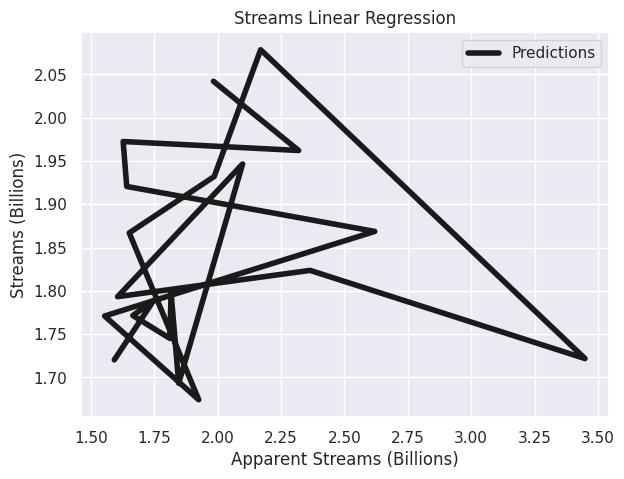

In [138]:
plt.subplots(figsize=(15, 5))
plt.subplot(121)

#plt.scatter(x_te_s, y_te_s)
#plt.plot(x_te_s.values, model_streams_preds, 'k', linewidth=4)
plt.plot(y_te_s.values, model_streams_preds, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title('Streams Linear Regression')
plt.xlabel('Apparent Streams (Billions)')
plt.ylabel('Streams (Billions)')

We originally only wanted to put acousticness, energy, and loudness which we got from our correlation plots. However, the sklearn score was only 0.166 which was far from ideal. We decided to rank all the correlation numbers for features v.s. streams. We decided to remove variables bit by bit to see their effect on the score. We decided to go with all correlation scores above ~0.1. We gave an exception to tempo since it is very close to 0.1. We ended up with a score of 0.289, which is a bit better than the previous number. We also plotted the linear regression to see the general shape it had. The linear regression plot is extremely chaotic and does not appear to follow a trend. Next time, we could try using different plots like quadratic and logistic. 

In [158]:
# example usage of the regression 
# The model predicts a song with acousticness of 9.3, energy of 7.1, moduality of 1.0, 
# instrumentalness of 0.0, loudness of -5.63, and tempo of 108 would lead to 
# 0.937 billion streams.
'acousticness','energy','mode','instrumentalness','loudness','tempo'
X_predict = [[9.3,7.1,1.0,0.0,-5.63,108]] 
Y_predict = model_streams.predict(X_predict)
Y_predict[0]

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.9366361694090628

### Classification Models

We will use a binary classification model to predict whether or not a song is "popular." 

First, we will add a column to the dataset to signify whether or not a song is popular (has 2 billion or more streams on Spotify). If the song is popular, we give it a value of 1, and if not, we give it a value of 0.

In [120]:
# If the song has more than 2 billion streams, give it a value of 1. If not, give it a value of 0.
merged["two billion"] = np.where(merged['Streams (Billions)'] < 2, 0, 1)
merged

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Artist,Streams (Billions),Release Date,two billion
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514,The Weeknd,3.449,29-Nov-19,1
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825,Ed Sheeran,3.398,06-Jan-17,1
2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824,Tones And I,2.770,10-May-19,1
3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501,Lewis Capaldi,2.680,08-Nov-18,1
4,0e7ipj03S05BNilyu5bRzt,Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585,Post Malone featuring 21 Savage,2.620,15-Sep-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5kqIPrATaCc2LqxVWzQGbk,7 Years,3.96,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765,Lukas Graham,1.529,16-Jun-15,0
96,3AJwUDP919kvQ9QcozQPxg,Yellow,4.45,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429,Coldplay,1.527,26-Jun-00,0
97,6UelLqGlWMcVH1E5c4H7lY,Sugar,2.90,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548,Maroon 5,1.524,29-Aug-14,0
98,6habFhsOp2NvshLv26DqMb,Despacito,3.82,0.797,2,-4.787,1,0.1530,0.19800,0.000000,0.0670,0.839,177.928,0.655,Luis Fonsi featuring Daddy Yankee,1.522,12-Jan-17,0


KNearestNeighbors Classifier

For an initial impression of how a model would perform, we will start by using a KNearestNeighbors Classifier. We want to start with a model that was relatively simpler to tune and reproduce compared to other models. Also, since the model was based off of distance, we might be able to gain a more clear understanding of the results by graphing them and being able to visually see what the model is doing.

We first create a model using two features: energy and acousticness. We picked out these two features by looking at the correlation matrix created earlier with our basic visualization of the data. From the matrix, we picked out the two features that have the highest correlation with the number of streams. The target set is whether or not the song is popular, so we will use the column we made earlier that used binary variables to signify whether a song is popular. After instantiating these two sets, we will split the data into the testing and training data and train the model using the KNN Classifier (defaulted to 5 neighbors).

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = merged[['energy', 'acousticness']]
target = merged['two billion']

feat_train, feat_test, tar_train, tar_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = KNeighborsClassifier()

model.fit(feat_train, tar_train)

predictions = model.predict(feat_test)
print("Accuracy Score:", accuracy_score(tar_test, predictions))


Accuracy Score: 0.65


From this initial model, the KNN Classifier seems to do a mediocre job at predicting whether or not a song is popular. In creating our model, our initial accuracy goal was a range from 70-85% as we wanted a workable accuracy score that also didn't immediately appear to be a consequence of overfitting, so we interpret a 65% accuracy to be a good start but a slightly low accuracy. 

After creating our initial model, we will now try to tune the model to try to obtain a slightly higher accuracy, perhaps one in the 75-90% range. To do this, we will try both testing multiple varieties of features as well as different number of neighbors. First, we start with feature selection. While the correlation matrix provided a good start on the best features to use, maybe there is something that the matrix missed. Because the KNN Classifier has a relatively quick computation time, we will use enumeration to figure out the best features to use.

In the code below, we create a new DataFrame with just the features we can consider; it excludes unnecessary columns, like the song ID and song name. Then, for every combination of feature pairs, we train a KNN model (defaulted to 5 neighbors) using these two feature pairs and calculate the resulting accuracy. We will store the pairs and accuracies in a dictionary, and we will focus on the two features with the highest accuracy.

In [122]:
# Features: 'energy', 'mode', 'loudness', 'tempo', 'speechiness', 'liveness', 'duration', 'valence', 
#           'key', 'danceability', 'instrumentalness', 'acousticness'

merged_features = merged[['energy', 'mode', 'loudness', 'tempo', 'speechiness', 'liveness', 'duration', 'valence', 'key', 'danceability', 'instrumentalness', 'acousticness']]

# Dictionary to store feature pairs and their corresponding accuracies (pairs:accuracies)
pairs = {}

for col in merged_features:
    for col2 in merged_features:
        features_Sel = merged_features[[col, col2]]
        target_Sel = merged['two billion']

        feat_train, feat_test, tar_train, tar_test = train_test_split(features_Sel, target_Sel, test_size=0.2, random_state=42)

        model = KNeighborsClassifier()

        model.fit(feat_train, tar_train)

        predictions = model.predict(feat_test)

        accuracy = accuracy_score(tar_test, predictions)

        pairs[(col, col2)] = accuracy

        #print("Accuracy Score for features (" + col + " and " + col2 + "):", accuracy)

In the code below, we sort the resulting dictionary in descending order by accuracy. From the features tested, the feature pairs that appear to have the best accuracies are energy and loudness, loudness and duration, loudness and valence, energy and speechiness, and energy and instrumentalness. Overall, it appears that the best features to look at are energy and loudness as they seem to be the most crucial in determining what makes a song popular.

In [123]:
sorted_pairs = sorted(pairs.items(), key=lambda x:x[1], reverse=True)

print(sorted_pairs)

[(('energy', 'loudness'), 0.9), (('loudness', 'energy'), 0.9), (('loudness', 'duration'), 0.85), (('loudness', 'valence'), 0.85), (('duration', 'loudness'), 0.85), (('valence', 'loudness'), 0.85), (('energy', 'speechiness'), 0.8), (('energy', 'instrumentalness'), 0.8), (('speechiness', 'energy'), 0.8), (('instrumentalness', 'energy'), 0.8), (('energy', 'energy'), 0.75), (('energy', 'mode'), 0.75), (('energy', 'valence'), 0.75), (('energy', 'danceability'), 0.75), (('mode', 'energy'), 0.75), (('mode', 'loudness'), 0.75), (('mode', 'valence'), 0.75), (('mode', 'acousticness'), 0.75), (('loudness', 'mode'), 0.75), (('loudness', 'loudness'), 0.75), (('loudness', 'tempo'), 0.75), (('loudness', 'liveness'), 0.75), (('loudness', 'instrumentalness'), 0.75), (('loudness', 'acousticness'), 0.75), (('tempo', 'loudness'), 0.75), (('tempo', 'key'), 0.75), (('speechiness', 'instrumentalness'), 0.75), (('speechiness', 'acousticness'), 0.75), (('liveness', 'loudness'), 0.75), (('liveness', 'danceabili

In [124]:
# Running the KNN with just energy and loudness

features_Sel = merged_features[['energy', 'loudness']]
target_Sel = merged['two billion']

feat_train, feat_test, tar_train, tar_test = train_test_split(features_Sel, target_Sel, test_size=0.2, random_state=42)

model = KNeighborsClassifier()

model.fit(feat_train, tar_train)

KNeighborsClassifier()

We can further tune this model by selecting the best value to use for the number of neighbors. We will loop through values for the number of neighbors from 1 to 30, train the KNN model with the selected number of neighbors, and store the accuracy score. Then, we will graph the accuracies for each number of neighbors to figure out the best value for the model with energy and loudness as features.

In [125]:
import matplotlib.pyplot as plt

accuracies = []
for i in range(1,31):
    model = KNeighborsClassifier(i)
    model.fit(feat_train, tar_train)
    predictions = model.predict(feat_test)
    
    accuracies.append(accuracy_score(tar_test, predictions))

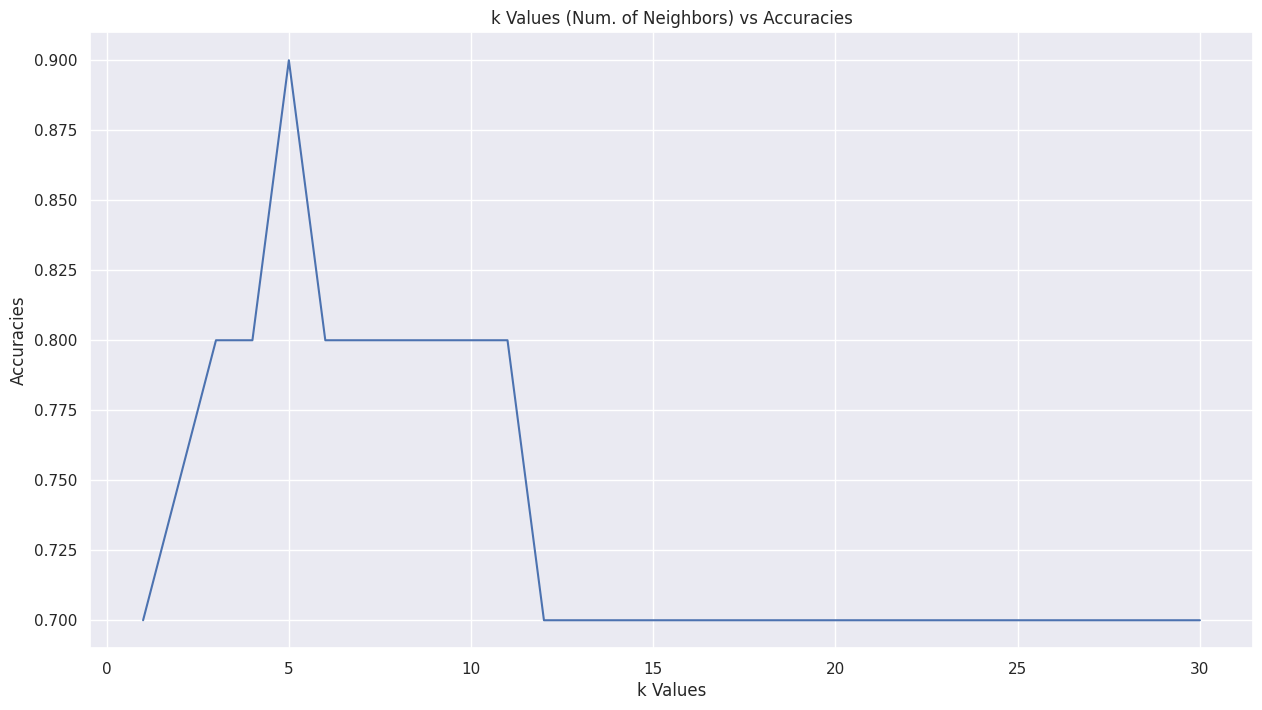

In [126]:
plt.plot(range(1,31), accuracies)
plt.title('k Values (Num. of Neighbors) vs Accuracies')
plt.xlabel('k Values')
plt.ylabel('Accuracies')
plt.show()

Based on the k values v.s. accuracies graph, 5 neighbors appears to be the most optimal value for the model, which is the number of neighbors we have been training on. Using the energy and loudness features as well as 5 neighbors to train the KNN model, our model has now achieved 90% accuracy. Although this accuracy is a large improvement from our original model, we believe our model may be overfitting. However, even with using a smaller k value, we can achieve an accuracy that ranges from 80-85%, which is still an improvement from our original accuracy and a potentially realistic output.

Decision Tree Classifier

To get a better representation of how our KNN model performs, we will also create a model using the Decision Tree Classifier to compare the two models' performances. We are choosing to use a Decision Tree because the output is relatively simple to understand and it can work well with many features, so there is less dependence of our model on good feature selection.

For our model, we will use all available features to predict whether or not a song is popular. Then, we will split the new data into training and testing data and train the Decision Tree Classifier on this new split with a max_depth of 5. In the beginning, this depth is arbitrary as we will need to tune the depth parameter to get the best depth for our model.

In [127]:
merged_features = merged[['energy', 'mode', 'loudness', 'tempo', 'speechiness', 'liveness', 'duration', 'valence', 'key', 'danceability', 'instrumentalness', 'acousticness']]
target = merged['two billion']

feat_train, feat_test, tar_train, tar_test = train_test_split(merged_features, target, test_size=0.2, random_state=42)

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=5)

model.fit(feat_train, tar_train)

dtree_pred_train = model.predict(feat_train)
dtree_pred_test = model.predict(feat_test)
print("Train Accuracy:", accuracy_score(tar_train, dtree_pred_train))
print("Test Accuracy:", accuracy_score(tar_test, dtree_pred_test))

Train Accuracy: 0.925
Test Accuracy: 0.75


From the outset, the accuracy of this new model appears to perform similarly, if not a little better than the KNN Classifier model. However, the Decision Tree Classifier is known to overfit, and there definitely seems to be some overfitting here, since the train accuracy is higher than the test accuracy. Let's try testing out different values for max_depth and potentially play around with other parameters to see if we can get the test accuracy to be higher and reduce overfitting. 

In [129]:
train_accuracies = []
test_accuracies = []
for i in range(1,16):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(feat_train, tar_train)
    train_predictions = model.predict(feat_train)
    test_predictions = model.predict(feat_test)
    
    train_accuracies.append(accuracy_score(tar_train, train_predictions))
    test_accuracies.append(accuracy_score(tar_test, test_predictions))

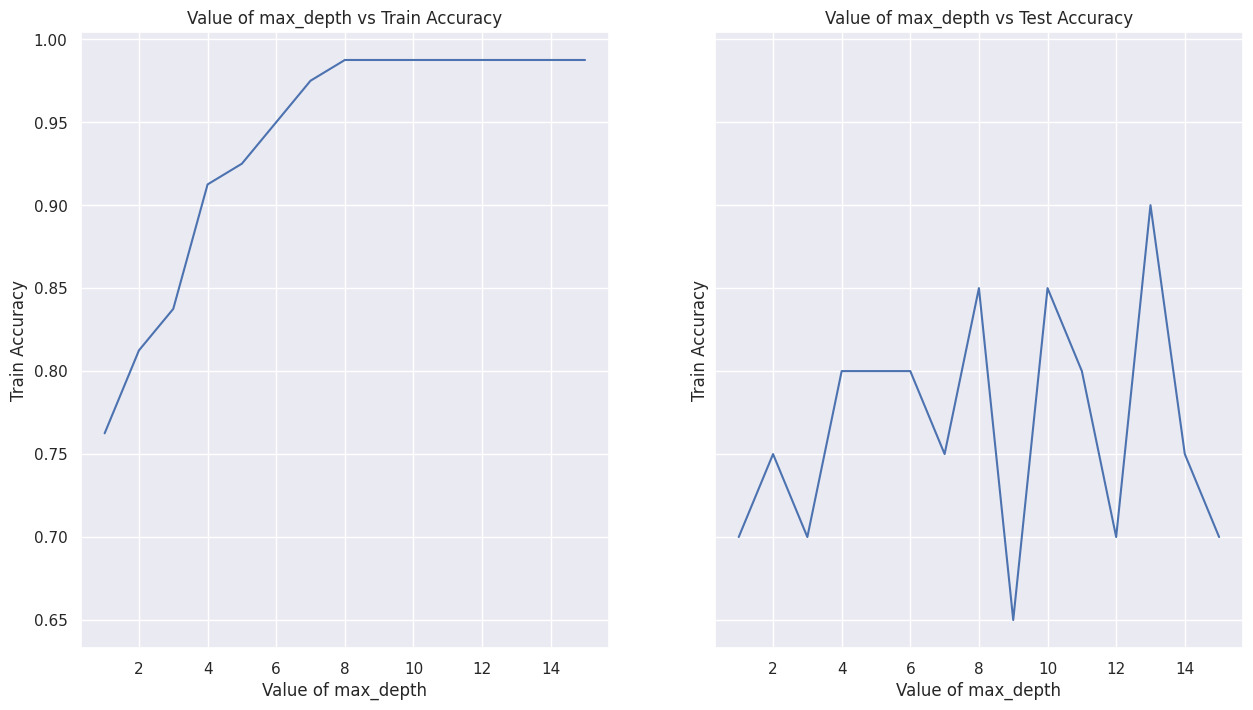

In [130]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(range(1,16), train_accuracies)
ax1.set_title('Value of max_depth vs Train Accuracy')
ax1.set_xlabel('Value of max_depth')
ax1.set_ylabel('Train Accuracy')

ax2.plot(range(1, 16), test_accuracies)
ax2.set_title('Value of max_depth vs Test Accuracy')
ax2.set_xlabel('Value of max_depth')
ax2.set_ylabel('Train Accuracy')

plt.show()

Looking at both the train and test accuracies, there definitely do appear to be points at which the train and test accuracies are noticeably better than others. At first, we thought this was an indication that the best value of max_depth would be the locations at which the train and test accuracies were the highest. However, after running the previous two cells multiple times, we noticed large, drastic changes to the graph of the test accuracies. These changing results most likely mean that there is a lot of overfitting occurring and the model is not returning a very reliable or realistic result. The values for the test accuracies consistently range within 65-85% accuracy every time the code is run, but there is not one consistently reliable value for max_depth. Below, we graph the various accuracy graphs after training the model in the same way as above 2 additional times. From comparing these the graphs of the test accuracies with each other and with the test accuracy graph above, we noticed this lack of pattern and concluded our model was overfitting.

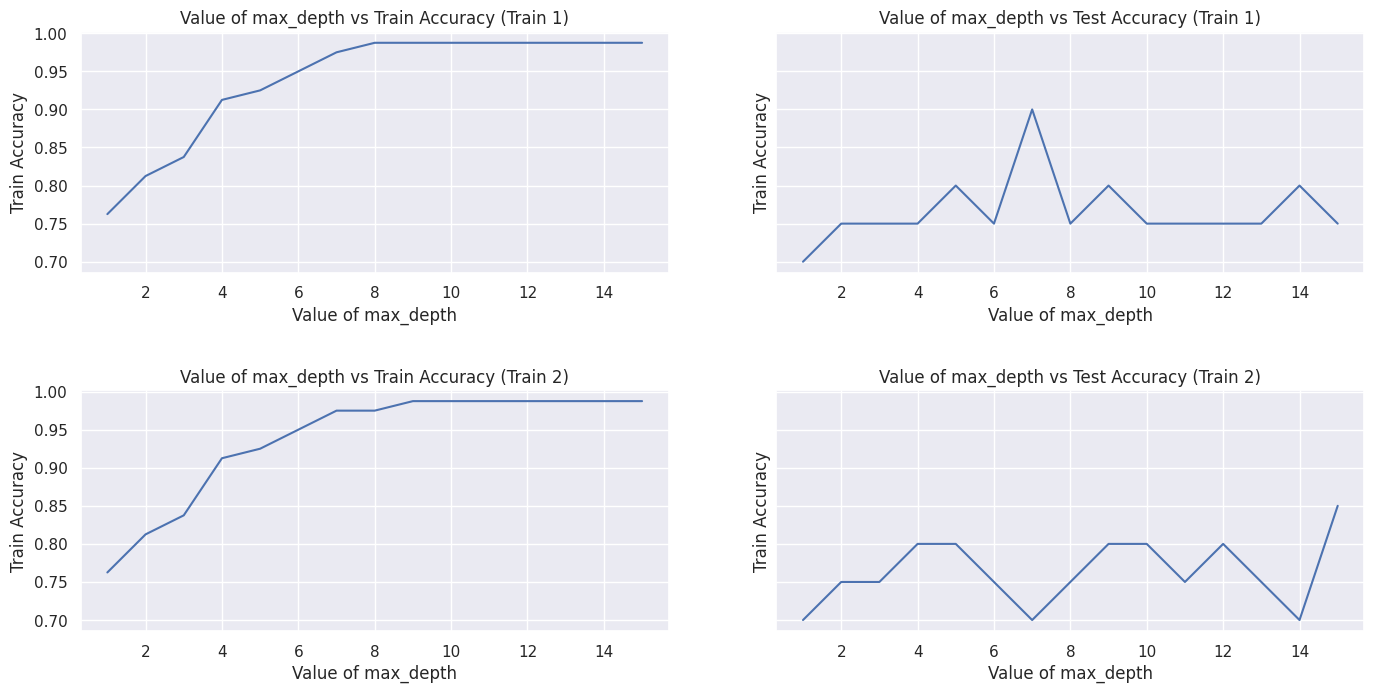

In [131]:
# Training two additional times

train_accuracies_1 = []
test_accuracies_1 = []
for i in range(1,16):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(feat_train, tar_train)
    train_predictions = model.predict(feat_train)
    test_predictions = model.predict(feat_test)
    
    train_accuracies_1.append(accuracy_score(tar_train, train_predictions))
    test_accuracies_1.append(accuracy_score(tar_test, test_predictions))

train_accuracies_2 = []
test_accuracies_2 = []
for i in range(1,16):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(feat_train, tar_train)
    train_predictions = model.predict(feat_train)
    test_predictions = model.predict(feat_test)
    
    train_accuracies_2.append(accuracy_score(tar_train, train_predictions))
    test_accuracies_2.append(accuracy_score(tar_test, test_predictions))

# Graphing the new accuracies to show how much the graphs vary with each run

f, axes = plt.subplots(2, 2, sharey=True)
f.tight_layout(pad=5.0)

axes[0,0].plot(range(1,16), train_accuracies_1)
axes[0,0].set_title('Value of max_depth vs Train Accuracy (Train 1)')
axes[0,0].set_xlabel('Value of max_depth')
axes[0,0].set_ylabel('Train Accuracy')

axes[0,1].plot(range(1, 16), test_accuracies_1)
axes[0,1].set_title('Value of max_depth vs Test Accuracy (Train 1)')
axes[0,1].set_xlabel('Value of max_depth')
axes[0,1].set_ylabel('Train Accuracy')

axes[1,0].plot(range(1,16), train_accuracies_2)
axes[1,0].set_title('Value of max_depth vs Train Accuracy (Train 2)')
axes[1,0].set_xlabel('Value of max_depth')
axes[1,0].set_ylabel('Train Accuracy')

axes[1,1].plot(range(1, 16), test_accuracies_2)
axes[1,1].set_title('Value of max_depth vs Test Accuracy (Train 2)')
axes[1,1].set_xlabel('Value of max_depth')
axes[1,1].set_ylabel('Train Accuracy')

plt.show()

To try to reduce this overfitting, we will reduce the number of features used and see if this gets more stable results. To choose the best features, we will consider the feature selection we conducted with the KNN model and the correlation matrix visual as these results give some direction as to which features help most with predicting popularity. We will train a Decision Tree Classifier model with features: energy, loudness, duration, valence, and speechiness (reducing the number of features used by more than half). We set the max_depth to be 5, so we can get an initial comparison with the data from the first Decision Tree Classifier model we ran.

In [132]:
merged_features = merged[['energy', 'loudness', 'speechiness', 'duration', 'valence']]
target = merged['two billion']

feat_train, feat_test, tar_train, tar_test = train_test_split(merged_features, target, test_size=0.2, random_state=42)

In [133]:
dtree_model = tree.DecisionTreeClassifier(max_depth=5)
dtree_model.fit(feat_train, tar_train)
train_predictions = dtree_model.predict(feat_train)
test_predictions = dtree_model.predict(feat_test)

print('Train Accuracy:', accuracy_score(tar_train, train_predictions))
print('Test Accuracy:', accuracy_score(tar_test, test_predictions))

Train Accuracy: 0.8875
Test Accuracy: 0.65


Comparing these accuracies to the accuracies from the first model, there appears to be a slightly worse performance but also slightly less overfitting. From this initial training, it is a little difficult to tell how much of a difference reducing the features made on the Decision Tree's performance, so like we did previously, we will graph the accuracies depending on the max_depth on this revised model.

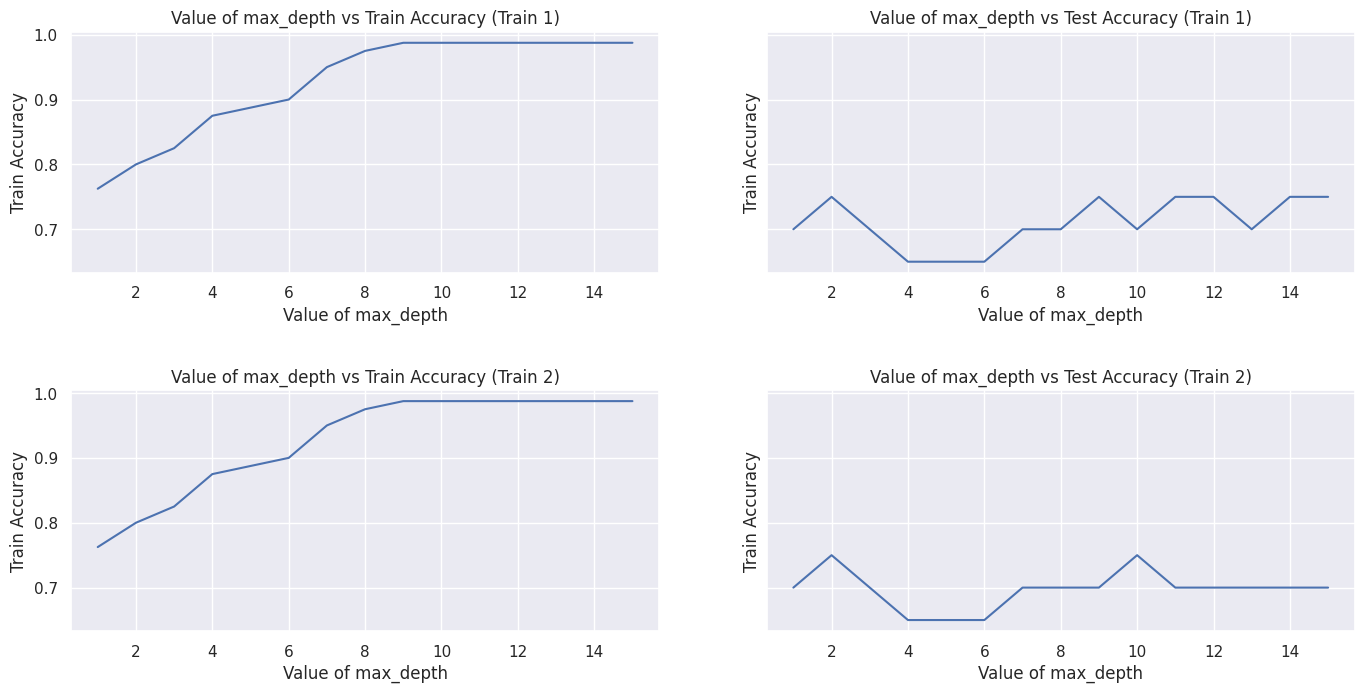

In [134]:
# Training two additional times

train_accuracies_1 = []
test_accuracies_1 = []
for i in range(1,16):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(feat_train, tar_train)
    train_predictions = model.predict(feat_train)
    test_predictions = model.predict(feat_test)
    
    train_accuracies_1.append(accuracy_score(tar_train, train_predictions))
    test_accuracies_1.append(accuracy_score(tar_test, test_predictions))

train_accuracies_2 = []
test_accuracies_2 = []
for i in range(1,16):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(feat_train, tar_train)
    train_predictions = model.predict(feat_train)
    test_predictions = model.predict(feat_test)
    
    train_accuracies_2.append(accuracy_score(tar_train, train_predictions))
    test_accuracies_2.append(accuracy_score(tar_test, test_predictions))

# Graphing the new accuracies to show how much the graphs vary with each run

f, axes = plt.subplots(2, 2, sharey=True)
f.tight_layout(pad=5.0)

axes[0,0].plot(range(1,16), train_accuracies_1)
axes[0,0].set_title('Value of max_depth vs Train Accuracy (Train 1)')
axes[0,0].set_xlabel('Value of max_depth')
axes[0,0].set_ylabel('Train Accuracy')

axes[0,1].plot(range(1, 16), test_accuracies_1)
axes[0,1].set_title('Value of max_depth vs Test Accuracy (Train 1)')
axes[0,1].set_xlabel('Value of max_depth')
axes[0,1].set_ylabel('Train Accuracy')

axes[1,0].plot(range(1,16), train_accuracies_2)
axes[1,0].set_title('Value of max_depth vs Train Accuracy (Train 2)')
axes[1,0].set_xlabel('Value of max_depth')
axes[1,0].set_ylabel('Train Accuracy')

axes[1,1].plot(range(1, 16), test_accuracies_2)
axes[1,1].set_title('Value of max_depth vs Test Accuracy (Train 2)')
axes[1,1].set_xlabel('Value of max_depth')
axes[1,1].set_ylabel('Train Accuracy')

plt.show()

In running the model and creating the graph multiple times, we now noticed that a max_depth of 2 does seem to have a consistent train and test accuracy (for this model and for our original Decision Tree model with all the features as well!). From this, we infer that a max_depth of 2 may be the best depth for our model as it does appear to have the least overfitting and the most consistent train and test accuracies. To confirm our suspicions, let's average up the test accuracies of our current model with 5 features and examine the results.

In [135]:
from statistics import mean

train_accD2 = []
test_accD2 = []

for i in range(1, 16):
    model = tree.DecisionTreeClassifier(max_depth=2)
    model.fit(feat_train, tar_train)
    train_predictions = model.predict(feat_train)
    test_predictions = model.predict(feat_test)

    train_accD2.append(accuracy_score(tar_train, train_predictions))
    test_accD2.append(accuracy_score(tar_test, test_predictions))

print("Average Train Accuracy for Depth=2:", mean(train_accD2))
print("Average Test Accuracy for Depth=2:", mean(test_accD2))
print("Test Accuracies:", test_accD2)

Average Train Accuracy for Depth=2: 0.8
Average Test Accuracy for Depth=2: 0.75
Test Accuracies: [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]


Our suspicions do seem to be supported by the data. As expected, the train data is consistently 80%, but what is more important is that the test accuracy for the model with a max_depth of 2 is also consistently at 75%. While this isn't a large improvement from the previous Decision Tree models and the KNN model, our model is able to consistently score a 75% accuracy (reliable and realistic) as well as not appear to be overfitting, since the train and test accuracies are relatively close. 

Running a similar test on the model with all the features with the max_depth set to 2 appears to also show a similar result (consistent test accuracy and a test accuracy close to the training accuracy). The results are shown below. This leads us to conclude that maybe it isn't the number of features that was the problem and that we have found the most ideal max_depth for our models!

In [136]:
from statistics import mean

merged_features = merged[['energy', 'mode', 'loudness', 'tempo', 'speechiness', 'liveness', 'duration', 'valence', 'key', 'danceability', 'instrumentalness', 'acousticness']]
target = merged['two billion']

feat_train, feat_test, tar_train, tar_test = train_test_split(merged_features, target, test_size=0.2, random_state=42)

train_accD2 = []
test_accD2 = []

for i in range(1, 16):
    model = tree.DecisionTreeClassifier(max_depth=2)
    model.fit(feat_train, tar_train)
    train_predictions = model.predict(feat_train)
    test_predictions = model.predict(feat_test)

    train_accD2.append(accuracy_score(tar_train, train_predictions))
    test_accD2.append(accuracy_score(tar_test, test_predictions))

print("Average Train Accuracy for Depth=2:", mean(train_accD2))
print("Average Test Accuracy for Depth=2:", mean(test_accD2))
print("Test Accuracies:", test_accD2)

Average Train Accuracy for Depth=2: 0.8125
Average Test Accuracy for Depth=2: 0.75
Test Accuracies: [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]


## Conclusion

Looking at the three models we investigated to predict whether or not a song is popular, we feel that either a KNN model or a Decision Tree model is best for our dataset and our question. First, we eliminated the Linear Regression model because the model has relatively low-performance scores (in terms of both its MSE and its sklearn score). Since the data is not linear, the Linear Regression model wasn't able to perform well with the data we trained it on. Furthermore, with little feature engineering, the Linear Regression model is a weak model in general, as we learned in lecture. In the future, we can attempt to use a different model like quadratic of logarithmic. Now, comparing the KNN model and the Decision Tree model: while at its best, the KNN model was able to achieve accuracies of 90%, it is difficult to fully reason that this is the best-performing model because overfitting likely played a large role in this model's high accuracy score. On average, however, both models appear to be able to perform well as they stayed around the 70-85% test accuracy range, which as we mentioned earlier is a relatively realistic accuracy score. 

If we had to select the best model, we would say that the Decision Tree Classifier was the best-performing model. In the end, the model was able to consistently achieve a 75% test accuracy with an ~80% train accuracy, which indicates less overfitting when the max_depth was 2 and more real predictions, which is not something we can definitively say for the KNN model and the Linear Regression model. In addition, the Decision Tree Classifier was able to work with more features and had more parameters we could play around with (in addition to max_depth) if we wanted to further tune the model, which is helpful when trying to design the best possible model for our question. To compare the Decision Tree Classifier with the Linear Regression model, the Decision Tree model is able to work well with non-linear data, and since our data doesn't appear to show a linear relationship, the Decision Tree Classifier is bound to be a stronger model than the Linear Regression model.

In the future, we would be interested in using our models on songs outside of the dataset and be able to predict whether songs that have not yet amassed 2 billion streams have the capabilities to. We would love to be able to pull our own data from Spotify's API and test our models with our own focused data. This would also likely help us gain a better understanding of which features are most important in defining a popular song.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab734181-821e-49ac-aca3-e48316e46288' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>